<a href="https://colab.research.google.com/github/jrami12/codepath-prework/blob/main/Labs/Scripts/lab4_social_media_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Lab 4

## Outline

Repeat exercises from Lab 2, but with the *X SuperBowl* social media dataset
- Loading installed packages
- Inspect data
- Explore plot types

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab4_social_media_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [56]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn as sl

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the X SuperBowl dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe
- Make sure you watch for line breaks and emojis that might cause problems with the data import

In [57]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_csv (r'/content/gdrive/MyDrive/Colab Notebooks/x_superbowl (1) (1).csv')

print (df)

Mounted at /content/gdrive
      Unnamed: 0                       _id                      created_at  \
0              0  6020fc7e9e1aa8e3e7ad0832  Mon Feb 08 04:29:58 +0000 2021   
1              1  6020fc7e9e1aa8e3e7ad0833  Mon Feb 08 04:29:55 +0000 2021   
2              2  6020fc7e9e1aa8e3e7ad0834  Mon Feb 08 04:29:48 +0000 2021   
3              3  6020fc7e9e1aa8e3e7ad0835  Mon Feb 08 04:29:43 +0000 2021   
4              4  6020fc7e9e1aa8e3e7ad0836  Mon Feb 08 04:29:42 +0000 2021   
...          ...                       ...                             ...   
9751           3  6020fbb89e1aa8e3e7ac0a78  Mon Feb 08 02:01:58 +0000 2021   
9752           4  6020fbb89e1aa8e3e7ac0a79  Mon Feb 08 01:00:24 +0000 2021   
9753           5  6020fbb89e1aa8e3e7ac0a7a  Sun Feb 07 23:44:20 +0000 2021   
9754           6  6020fbb89e1aa8e3e7ac0a7b  Sun Feb 07 23:33:40 +0000 2021   
9755           7  6020fbb89e1aa8e3e7ac0a7c  Sun Feb 07 23:32:32 +0000 2021   

                id               id_

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9756 entries, 0 to 9755
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 9756 non-null   int64  
 1   _id                        9756 non-null   object 
 2   created_at                 9756 non-null   object 
 3   id                         9756 non-null   float64
 4   id_str                     9756 non-null   int64  
 5   text                       9756 non-null   object 
 6   display_text_range         3222 non-null   object 
 7   source                     9747 non-null   object 
 8   truncated                  9756 non-null   bool   
 9   in_reply_to_status_id      2863 non-null   float64
 10  in_reply_to_status_id_str  2863 non-null   float64
 11  in_reply_to_user_id        2985 non-null   float64
 12  in_reply_to_user_id_str    2985 non-null   float64
 13  in_reply_to_screen_name    2985 non-null   objec

In [68]:
df.dropna(subset=['id_str'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9756 entries, 0 to 9755
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 9756 non-null   int64  
 1   _id                        9756 non-null   object 
 2   created_at                 9756 non-null   object 
 3   id                         9756 non-null   float64
 4   id_str                     9756 non-null   int64  
 5   text                       9747 non-null   object 
 6   display_text_range         3222 non-null   object 
 7   source                     9747 non-null   object 
 8   truncated                  9756 non-null   bool   
 9   in_reply_to_status_id      2863 non-null   float64
 10  in_reply_to_status_id_str  2863 non-null   float64
 11  in_reply_to_user_id        2985 non-null   float64
 12  in_reply_to_user_id_str    2985 non-null   float64
 13  in_reply_to_screen_name    2985 non-null   objec

## Prepare Data

➡️ Assignment Tasks
- Convert any numbers, such as user_mentioned, from strings into numbers
- Reduce the variables in your dataframe to only those that have useful data
- Optional: Locate outliers in any of the variables.   Filter them out if they are mistakes; keep them if they are exceptional cases.

text, retweet, favoite, like

In [62]:
columns_to_keep = ['text', 'retweeted', 'favorite_count']
df_cleaned = df[columns_to_keep]

In [63]:
df.dropna()
df['text'] = df['text'].str.replace('?', '')
df['text'] = df['text'].str.replace('\n', '')
df['text'] = df['text'].str.replace('amp;', '')
df['text'] = df['source'].str.replace('<a href="http://twitter.com/download/iphone"', '')


<ipython-input-63-0a06ca76435a>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['text'] = df['text'].str.replace('?', '')
<ipython-input-63-0a06ca76435a>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['source'].str.replace('<a href="http://twitter.com/download/iphone"', '')


In [65]:
df['is_quote_status'] = pd.to_numeric(df['is_quote_status'].replace('[\$,]', '', regex=True), errors='coerce')

In [ ]:
df_reduce = df.drop()

## Summarize Data

➡️ Assignment Tasks
- Create at least two charts to summarize and visualize the data
- Examples include: Number of posts per device; top 10 posts with highest engagement

In [69]:
#chart 1
retweet_column = 'retweet_count'
favorite_column = 'favorite_count'
df['engagement'] = df[retweet_column] + df[favorite_column]
df_sorted = df.sort_values(by='engagement', ascending=False)
top_ten_tweets = df_sorted.head(10)
print(top_ten_tweets[['text', 'engagement']])

                                                   text  engagement
1531              rel="nofollow">Twitter for iPhone</a>        3094
9498  <a href="http://twitter.com/download/android" ...         770
8085              rel="nofollow">Twitter for iPhone</a>         465
9183              rel="nofollow">Twitter for iPhone</a>         445
7932  <a href="http://twitter.com/download/android" ...         439
8391              rel="nofollow">Twitter for iPhone</a>         420
9140              rel="nofollow">Twitter for iPhone</a>         282
9003              rel="nofollow">Twitter for iPhone</a>         267
8192  <a href="https://mobile.twitter.com" rel="nofo...         266
8944              rel="nofollow">Twitter for iPhone</a>         260


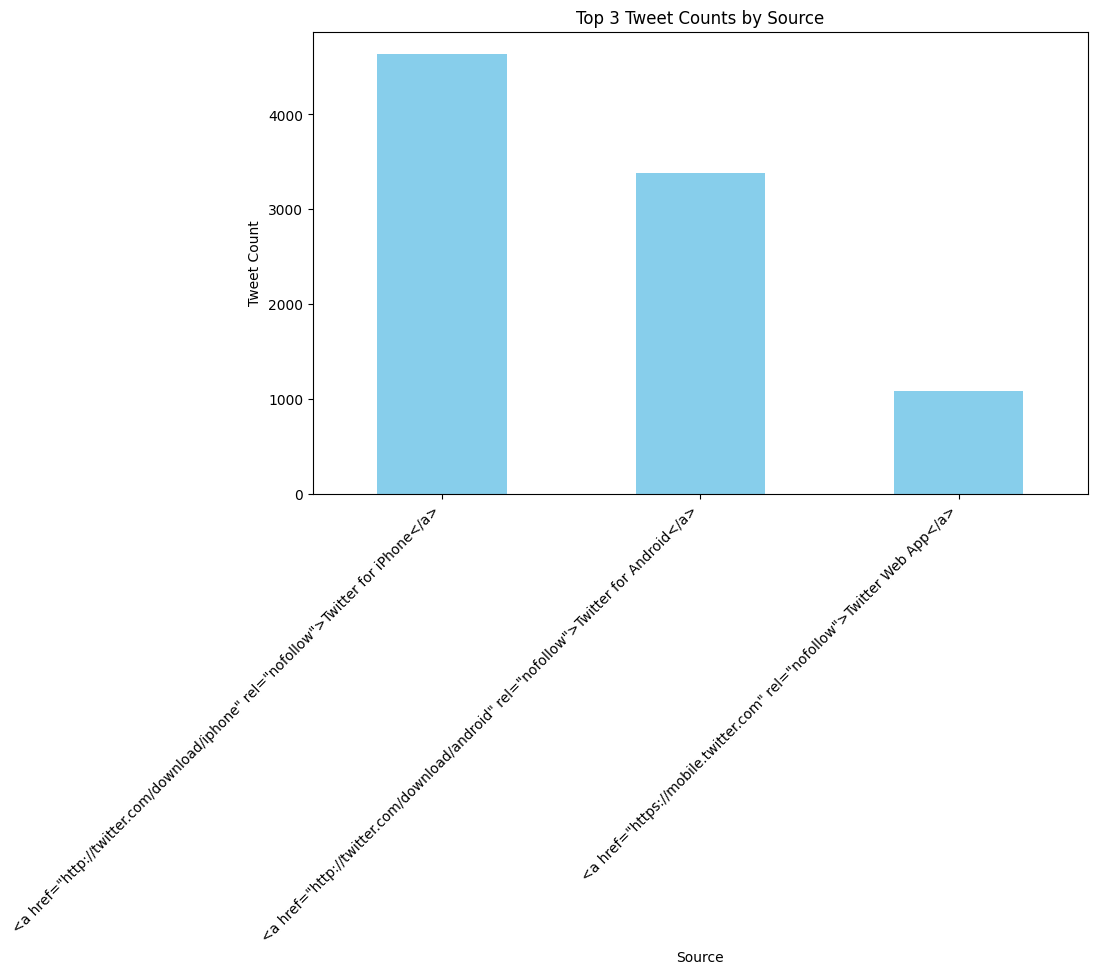

In [70]:
#chart 2
source_counts = df['source'].value_counts()
top_ten_sources = source_counts.head(3)
plt.figure(figsize=(10, 6))
top_ten_sources.plot(kind='bar', color='skyblue')
plt.title('Top 3 Tweet Counts by Source')
plt.xlabel('Source')
plt.ylabel('Tweet Count')
plt.xticks(rotation=45, ha='right')
plt.show()